In [11]:
!pip install xbbg

In [12]:
!pip install prophet

In [56]:
!pip install --index-url=https://blpapi.bloomberg.com/repository/releases/python/simple blpapi

Looking in indexes: https://blpapi.bloomberg.com/repository/releases/python/simple


In [57]:
#!pip install --index-url=https://blpapi.bloomberg.com/repository/releases/python/simple blpapi

In [58]:
!pip install findatapy

In [59]:
!pip install pmdarima

In [60]:
#from xbbg import blp
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from scipy import stats
from scipy.stats import zscore

from pmdarima.arima.utils import ndiffs

import statsmodels.api as sm
import statsmodels.tsa.api as smt
#statsmodels.tsa.arima.model.ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_predict

from itertools import product
from tqdm.notebook import tqdm

import datetime
from datetime import date, timedelta

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [281]:
tickers = input("Enter the Equity name. eg: AAPL US Equity\n")
#"AMZN US Equity"

In [282]:
commands = "PX_LAST"

In [ ]:

start = input("Enter the start date in YYYY-MM-DD format")
#start date considered - 2012-05-12'
a=input("Type YES if you want current date as end date or no for custom date")
 
if a=="YES":
    end=str(date.today())
else:
    end = str(input("Enter the end date in YYYY-MM-DD format"))
#end date considered - 2024-08-24'

In [ ]:
#importing the results in a .h5 file 
filename = hashlib.md5(''.join((tickers,"+",
          commands,"+",
          start,"+",
          end)).encode('utf-8')).hexdigest()
 
if os.path.exists(filename+'.csv'):
    data = pd.read_csv(filename+".csv", header=[0, 1],
    parse_dates=True,
    index_col=0)
else:
    data = blp.bdh(tickers=tickers.split(', ') , flds=commands.split(', '), start_date=start,  end_date=end,Per='D', Fill='P', Days='A', adjust='all')
    data.to_csv(filename+".csv")
   
df = data[tickers]
df

In [284]:
# Extracting last price and storing in a new dataframe
df_last = df[['PX_LAST']].copy()
df_last = df_last.dropna()
#df_last.head(20)

In [285]:
df_last

,PX_LAST
Dates,
2012-05-18,38.232
2012-05-21,34.030
2012-05-22,31.000
2012-05-23,32.000
2012-05-24,33.030
...,...
2024-08-06,494.090
2024-08-07,488.920
2024-08-08,509.630


In [286]:
def df_last_plot():
    sns.set(rc={'figure.figsize':(16, 8)})
    df_last.plot(label=f"{label_txt}")
    plt.title(f"{title_txt}", color = 'black', fontsize = 20)
    plt.xlabel('Date', color = 'black', fontsize = 15);
    plt.legend()

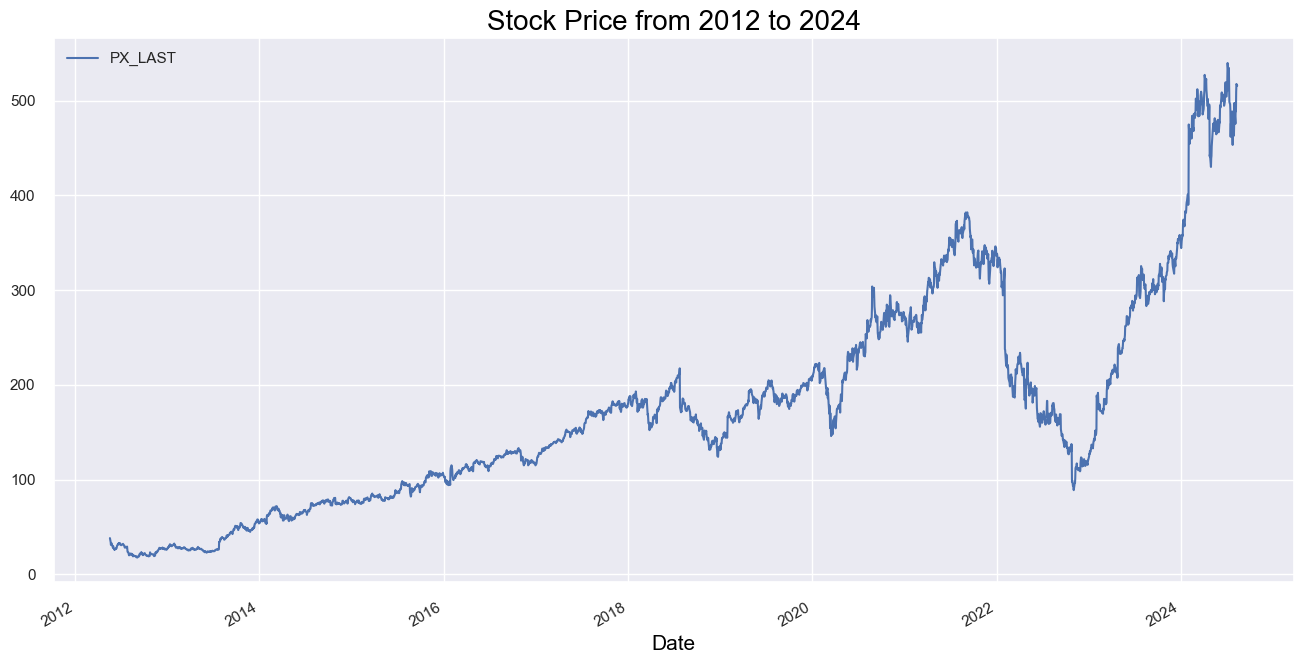

In [287]:
title_txt = "Stock Price from 2012 to 2024"
label_txt = "Stock Adjusted Close Price"

df_last_plot()

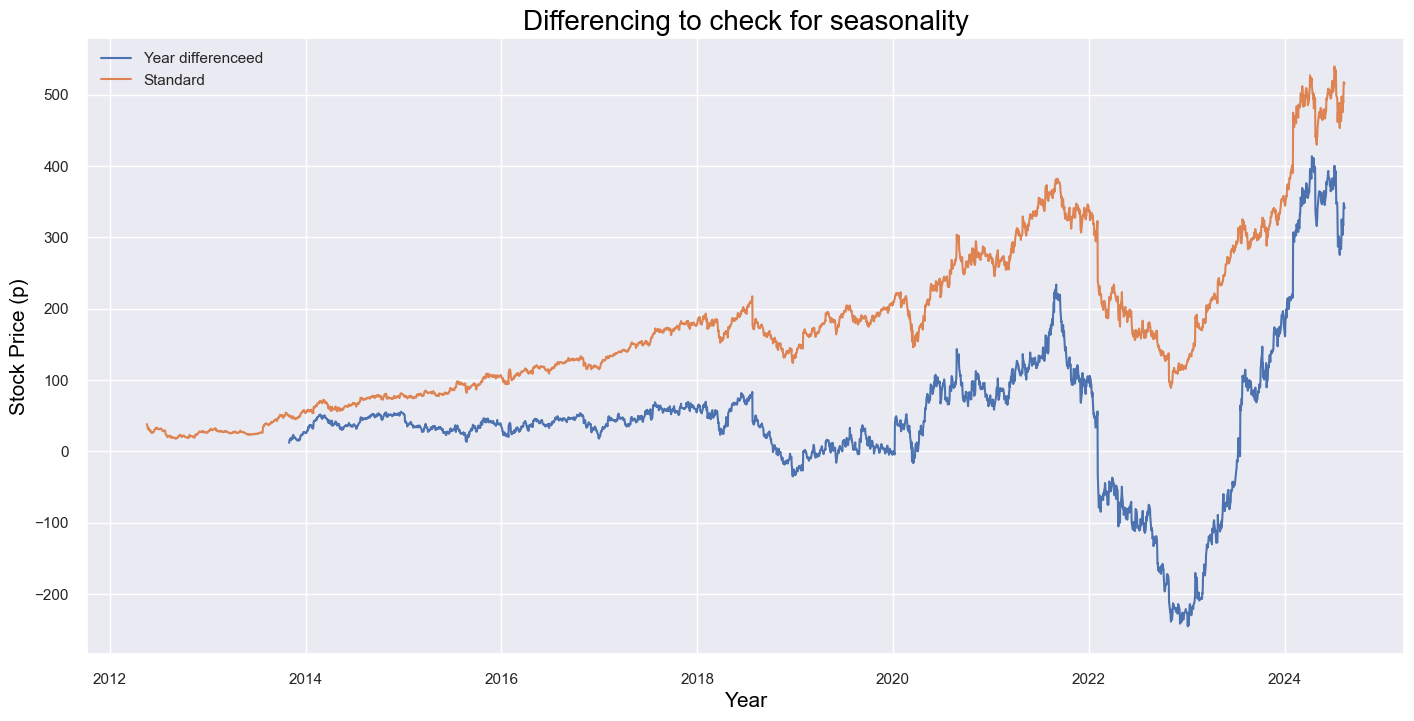

In [288]:
#Seasonality Check 

year_diff = df_last.diff(periods = 365)[365:]
plt.figure(figsize = (17, 8))
plt.plot(year_diff.index, year_diff, label = "Year differenceed")
plt.plot(df.index, df['PX_LAST'], label ="Standard")
plt.title("Differencing to check for seasonality", color = 'black', fontsize = 20)
plt.xlabel('Year', color='black', fontsize = 15)
plt.ylabel('Stock Price (p)', color='black', fontsize = 15)
plt.grid(True)
plt.legend();

In [289]:
#ADF Test for Stationarity 

result = adfuller(df_last.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value:{result[1]}')

for key, value in result[4].items():
    print('Critical values:')
    print(f'   {key}, {value}')
    

ADF Statistic: 0.6832879820009687
p-value:0.9894983832652834
Critical values:
   1%, -3.432483935945627
Critical values:
   5%, -2.86248283819979
Critical values:
   10%, -2.5672718962760706


In [290]:
# P value is greater than the 5 % significance level, thus series is non stationary

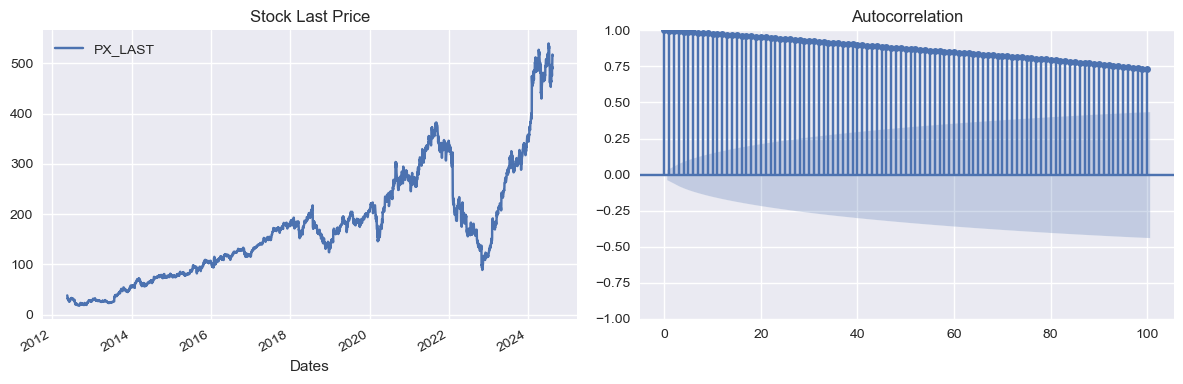

In [291]:
# ACF Plot 

def ts_acf(y, lags=None, figsize = (12, 4)):
    plt.style.use("seaborn-v0_8")
    fig = plt.figure(figsize = figsize)
    layout = (1,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ts_ax)
    ts_ax.set_title('Stock Last Price')
    smt.graphics.plot_acf(y, lags = lags, ax = acf_ax)
    plt.tight_layout()

ts_acf(df_last, lags = 100 )

In [292]:
#style.available

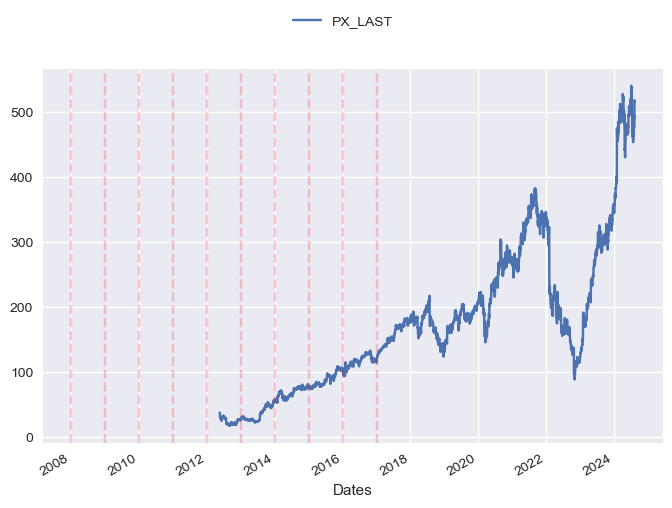

In [293]:
#acf -> remove trend 

ax = df_last.plot()
ax.legend(ncol=5, 
          loc='upper center',
          bbox_to_anchor=(0.5, 1.0),
          bbox_transform=plt.gcf().transFigure)
for yr in range(2008, 2018):
    ax.axvline(pd.to_datetime(str(yr)+"-01-01"), color ="red", linestyle = "--", alpha = 0.2)

In [294]:
# Do not run when testing
df_last_new = df_last.copy()

df_last_new["diff"] = df_last.diff()

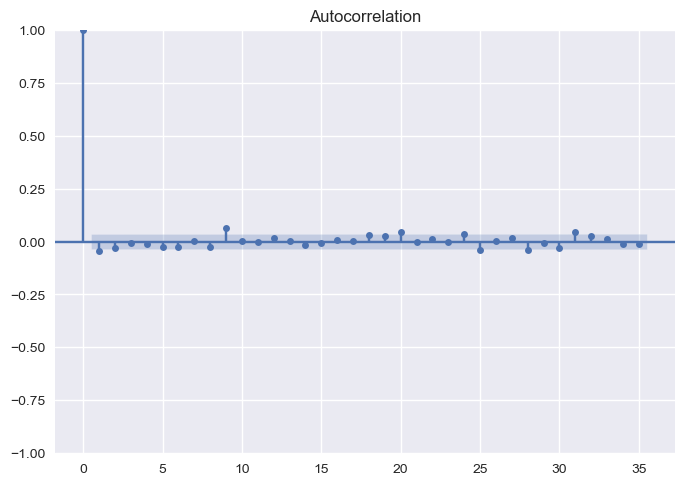

In [295]:
from statsmodels.graphics.tsaplots import plot_acf
df_last_new["diff"].iloc[0] = 0
plot_acf(df_last_new["diff"])
plt.show()

In [296]:
#Differencing 

In [297]:
diff1 = df_last.diff().dropna()

In [298]:
diff1

,PX_LAST
Dates,
2012-05-21,-4.202
2012-05-22,-3.030
2012-05-23,1.000
2012-05-24,1.030
2012-05-25,-1.120
...,...
2024-08-06,18.360
2024-08-07,-5.170
2024-08-08,20.710


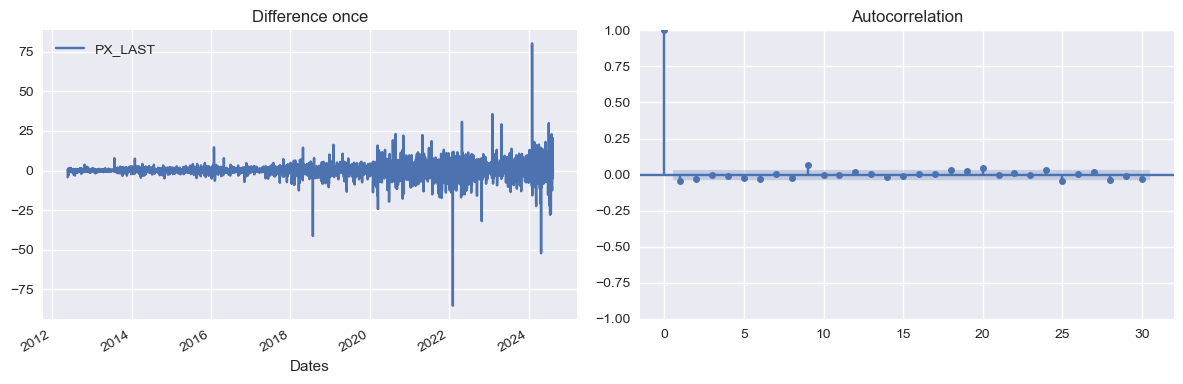

In [299]:
#Plotting the difference and ACF plot

def diff1_plot(y, lags= None, figsize=(12,4)):
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize = figsize)
    layout = (1,2)
    ax1 = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax = ax1)
    ax1.set_title('Difference once')
    smt.graphics.plot_acf(y, lags = lags, ax = acf_ax)
    plt.tight_layout()

diff1_plot(diff1, lags = 30)


In [300]:
# Second order differencing 

diff2 = diff1.diff().dropna()

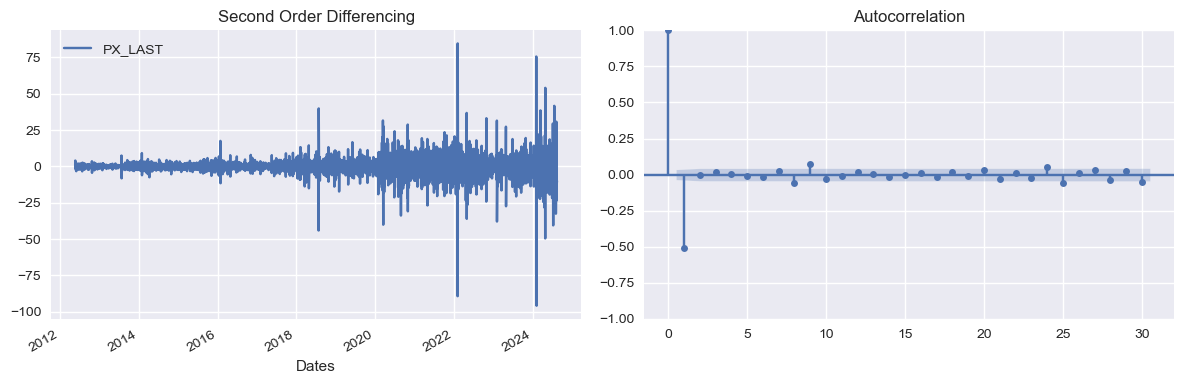

In [301]:
def diff2_plot(y, lags = None, figsize = (12, 4)):
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize = figsize)
    layout = (1,2)
    ax1 = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax = ax1)
    ax1.set_title('Second Order Differencing')
    smt.graphics.plot_acf(y, lags = lags, ax = acf_ax)
    plt.tight_layout()

diff2_plot(diff2, lags = 30)

In [302]:
ndiffs(df_last, test = "adf")

1

# Moving Average 

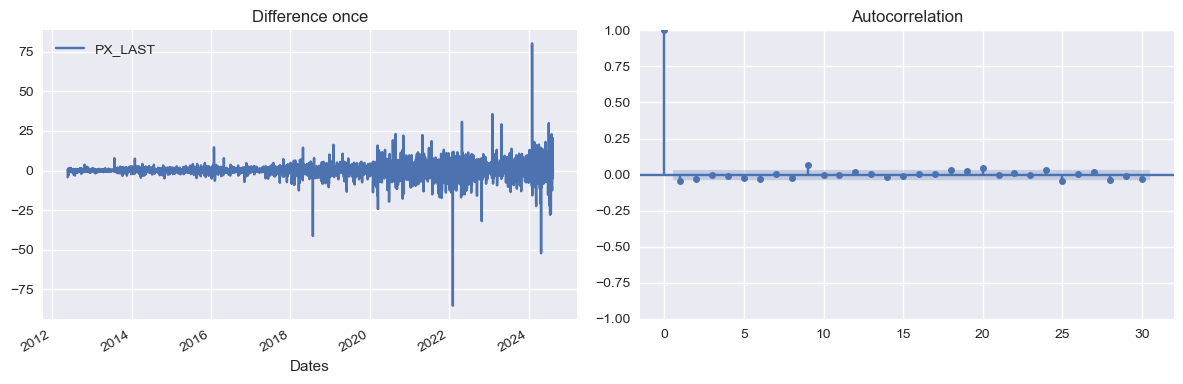

In [303]:
def diff1_plot(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    ax1 = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    y.plot(ax=ax1)
    ax1.set_title('Difference once')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
        
diff1_plot(diff1, lags=30)

In [252]:
result2 = adfuller(diff1)
print(f'ADF Statistic: {result2[0]}')
print(f'p-value: {result2[1]}')
for key, value in result2[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.59635559071682
p-value: 6.334848167938201e-19
Critial Values:
   1%, -3.4324979545720318
Critial Values:
   5%, -2.862489029824813
Critial Values:
   10%, -2.5672751926125317


In [304]:

# Fit ARIMA model with (p, d, q) terms

model = ARIMA(diff1, order=(3, 1, 3))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                PX_LAST   No. Observations:                 3076
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -9302.438
Date:                Tue, 13 Aug 2024   AIC                          18618.876
Time:                        18:04:11   BIC                          18661.094
Sample:                             0   HQIC                         18634.043
                               - 3076                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7981      0.015   -118.919      0.000      -1.828      -1.769
ar.L2         -1.0650      0.025    -43.277      0.000      -1.113      -1.017
ar.L3         -0.0400      0.013     -3.093      0.0

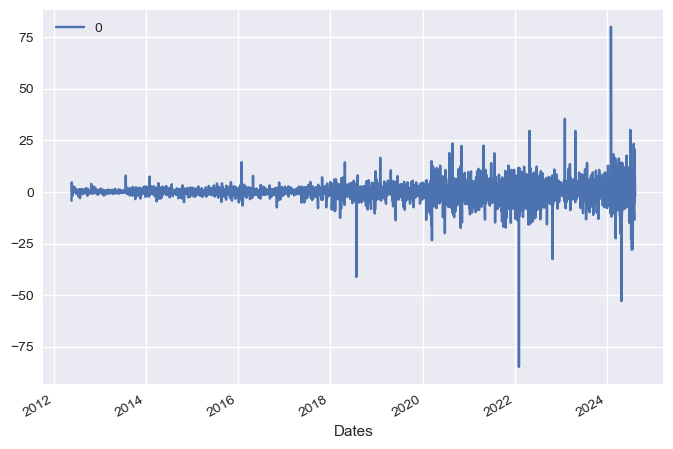

In [305]:
#Residual Errors

residuals = pd.DataFrame(result.resid)
residuals.plot();

In [306]:
def optimise_ARIMA(order_list, exog):
    """
    Optimise ARIMA model
    
    :param order_list: list with (p, d, q) tuples
    :param exog: the exogenous variable

    :return: dataframe with parameters and corresponding AIC 
    """
    results = []

    for order in tqdm(order_list):
        try:
            model = SARIMAX(exog, order=order).fit(disp=0)
        except:
            continue
        aic = model.aic
        results.append([order, model.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [307]:
# Parameters to iterate through
ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)

In [308]:

result_df = optimise_ARIMA(order_list, exog=df_last['PX_LAST'])

  0%|          | 0/64 [00:00<?, ?it/s]

In [309]:
result_df

,"(p, d, q)",AIC
0,"(4, 1, 5)",18599.391817
1,"(5, 1, 4)",18599.643713
2,"(6, 1, 4)",18602.770759
3,"(7, 1, 4)",18604.803228
4,"(3, 1, 3)",18607.179450
...,...,...
59,"(1, 1, 4)",18616.870788
60,"(4, 1, 2)",18617.193932
61,"(3, 1, 4)",18617.339539
62,"(0, 1, 0)",18617.457824


In [310]:
# Fit and print a summary of the best model, which is ARIMA (4,1,4)

best_model = ARIMA(df_last, order=(4, 1, 5)).fit()
print(best_model.summary())


                               SARIMAX Results                                
Dep. Variable:                PX_LAST   No. Observations:                 3077
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -9289.696
Date:                Tue, 13 Aug 2024   AIC                          18599.392
Time:                        18:06:26   BIC                          18659.706
Sample:                             0   HQIC                         18621.059
                               - 3077                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5683      0.009     60.970      0.000       0.550       0.587
ar.L2         -0.1683      0.008    -20.497      0.000      -0.184      -0.152
ar.L3          0.5741      0.009     65.829      0.0

In [311]:
forecast = best_model.get_forecast(steps = 126)
forecast_mean = forecast.predicted_mean

print(forecast_mean)

3077    516.323424
3078    514.277054
3079    513.884596
3080    514.987008
3081    514.163293
           ...    
3198    514.604108
3199    515.048209
3200    515.758213
3201    515.132830
3202    516.058198
Name: predicted_mean, Length: 126, dtype: float64


In [312]:
# Ljung-Box test and Augmented Dickey-Fuller test 
ljung_box, p_value = acorr_ljungbox(best_model.resid)

print(f'Ljung-Box test: {ljung_box[:10]}')
print(f'p-value: {p_value[:10]}')

Ljung-Box test: lb_stat
p-value: lb_pvalue


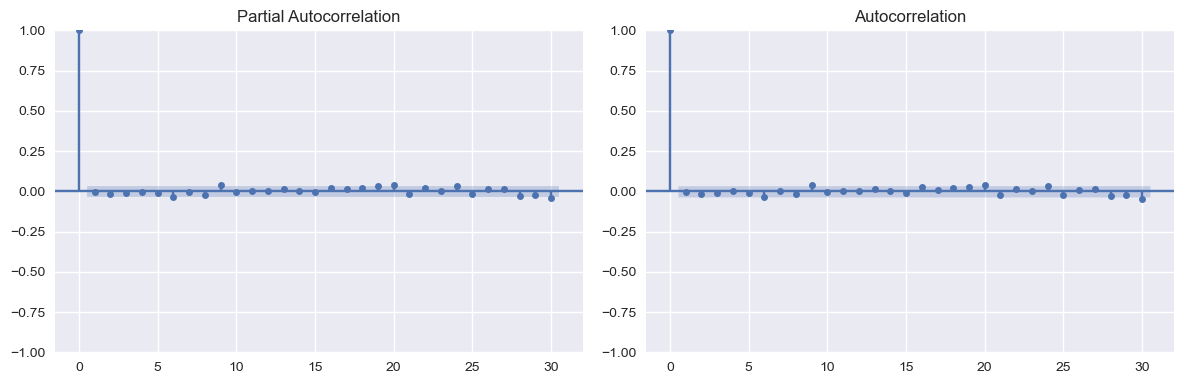

In [313]:

# Plot PACF and ACF

def pacf_acf_plot(y, lags=None, figsize=(12, 4)):
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize=figsize)
    layout = (1,2)
    pacf_ax = plt.subplot2grid(layout, (0,0))
    acf_ax = plt.subplot2grid(layout, (0,1))

    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
        
pacf_acf_plot(best_model.resid, lags=30)

In [314]:
best_model.mae

2.749681988648222

In [315]:
best_model.mse

25.047740448403104

In [316]:
best_model.fittedvalues

Dates
2012-05-18      0.000000
2012-05-21     38.231955
2012-05-22     34.230007
2012-05-23     31.230346
2012-05-24     31.997593
                 ...    
2024-08-06    475.880814
2024-08-07    493.435158
2024-08-08    490.642371
2024-08-09    507.239955
2024-08-12    516.438091
Length: 3077, dtype: float64

In [317]:
forecast_mean

3077    516.323424
3078    514.277054
3079    513.884596
3080    514.987008
3081    514.163293
           ...    
3198    514.604108
3199    515.048209
3200    515.758213
3201    515.132830
3202    516.058198
Name: predicted_mean, Length: 126, dtype: float64

In [318]:
from sklearn.metrics import r2_score

# Assuming 'y_true' is your actual data and 'y_pred' is your predicted data
y_true = df_last[-126:]  # Last 6 months of actual data
y_pred = forecast_mean  # Predicted data from the ARIMA model

# Calculate R-squared
r2 = r2_score(y_true, y_pred)
print(f'R-squared (R²): {r2}')


R-squared (R²): -1.5505156715768118


In [319]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'y_true' is your actual data and 'y_pred' is your predicted data
y_true = df_last[-126:]  # Last 6 months of actual data
y_pred = forecast_mean  # Predicted data from the ARIMA model

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 28.342570767565157
Mean Squared Error (MSE): 1171.086503196723
Root Mean Squared Error (RMSE): 34.22114117320933


'plt.rc("figure", figsize=(16,8))\n\nbest_model.plot_predict(\n      start=2391,\n      end=2517,\n      dynamic=False,\n);'

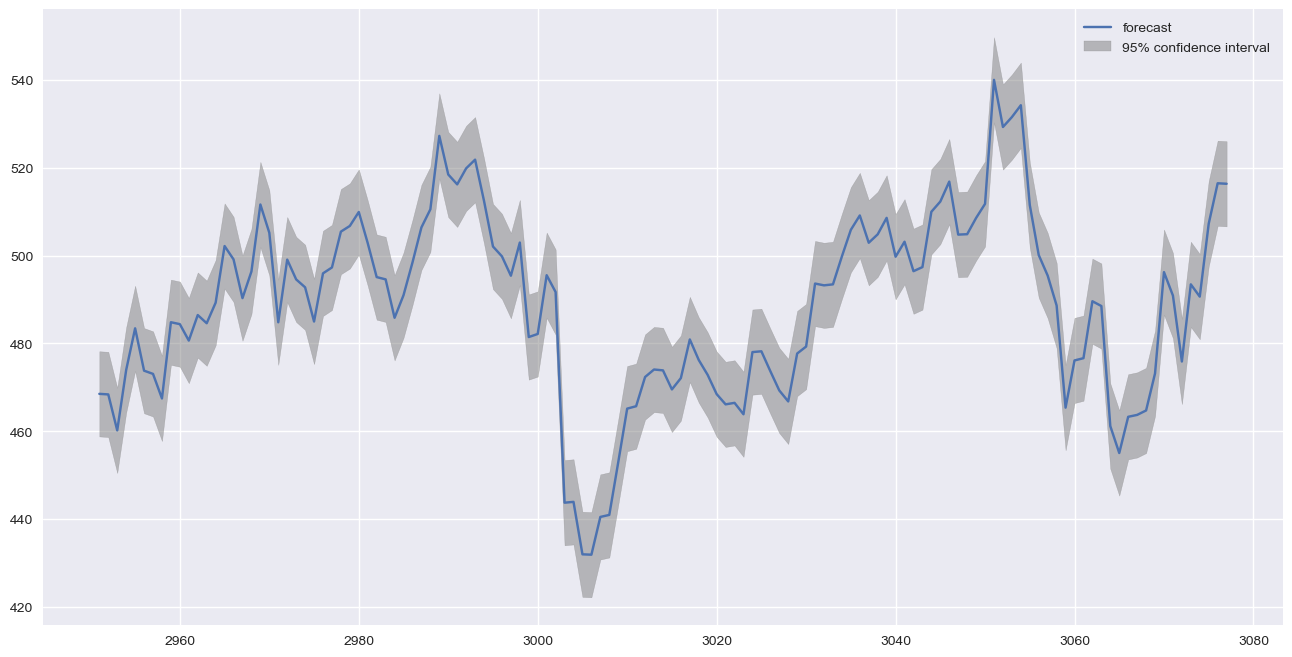

In [320]:

# Plot Actual vs predicted price 

plt.rc("figure", figsize=(16,8))

plot_predict( best_model,
      start=2951,
      end=3077,
      dynamic=False,
);



"""plt.rc("figure", figsize=(16,8))

best_model.plot_predict(
      start=2391,
      end=2517,
      dynamic=False,
);"""

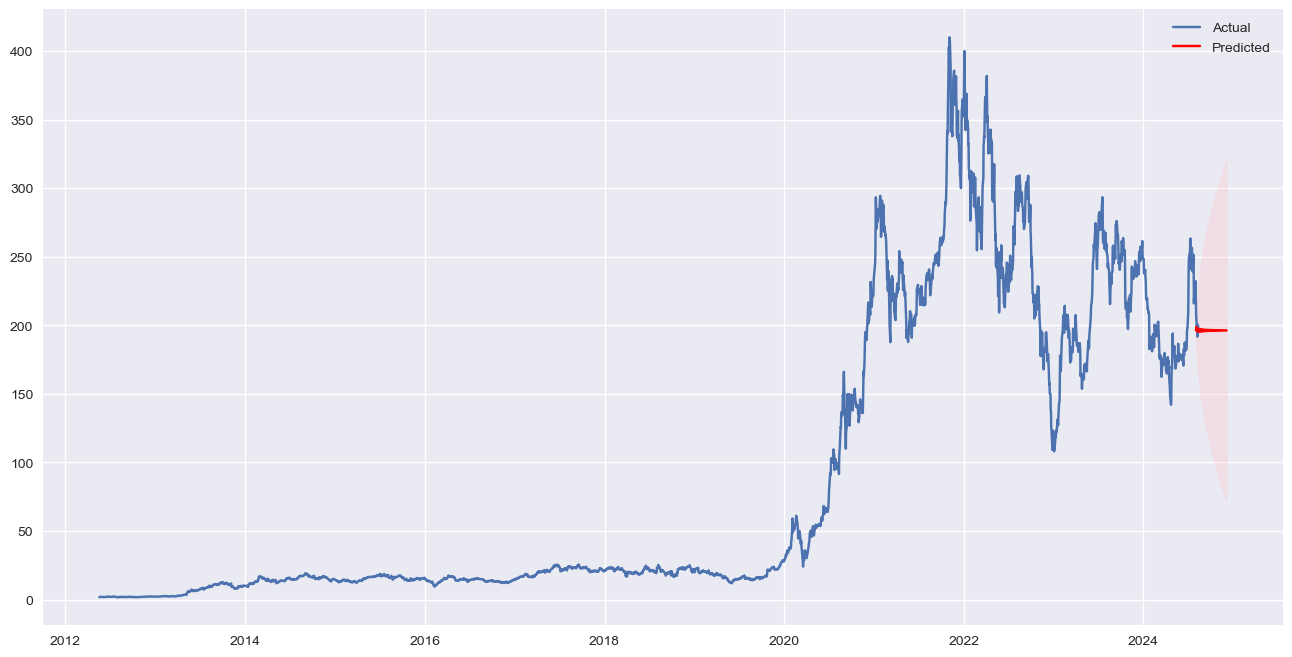

In [270]:
import matplotlib.pyplot as plt

# Assuming 'best_model' is your fitted ARIMA model
forecast = best_model.get_forecast(steps=126)  # 126 steps for 6 months if daily data
forecast_index = pd.date_range(start='2024-08-01', periods=126, freq='D')  # Adjust the start date as needed

# Get the forecasted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(df_last.index, df_last, label='Actual')
plt.plot(forecast_index, forecast_mean, label='Predicted', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


'from statsmodels.graphics.tsaplots import plot_predict\n\n# Assuming \'model_fit\' is your ARIMA model result\nplot_predict(best_model, start=\'2012\', end=\'2024\', dynamic=True, ax=ax)\n\n# Plot Actual vs predicted price extending 2 months into 2020\n\nplt.rc("figure", figsize=(16,8))\nbest_model.plot_predict(\n      start=2400,\n      end=2559,\n      dynamic=False,\n);'

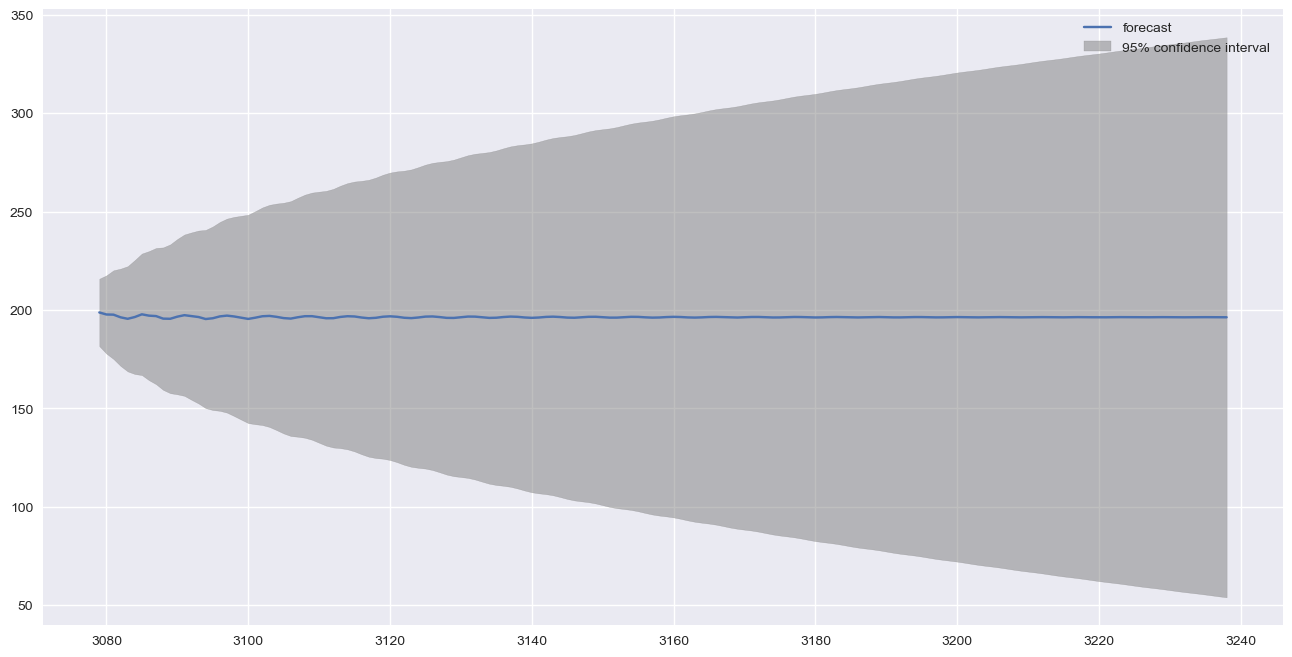

In [271]:
plt.rc("figure", figsize=(16,8))
plot_predict( best_model,
      start=3079,
      end=3238,
      dynamic=False,
);


"""from statsmodels.graphics.tsaplots import plot_predict

# Assuming 'model_fit' is your ARIMA model result
plot_predict(best_model, start='2012', end='2024', dynamic=True, ax=ax)

# Plot Actual vs predicted price extending 2 months into 2020

plt.rc("figure", figsize=(16,8))
best_model.plot_predict(
      start=2400,
      end=2559,
      dynamic=False,
);"""